# Introducción a _ggplot-plotnine_

## 1. Representa con _ggplot_ o _plotnine_ los datos del cuarteto de ascombe

In [100]:
import pandas as pd
from plotnine import *

df = pd.read_csv('../data/anscombe.csv').drop('Unnamed: 0', axis=1)

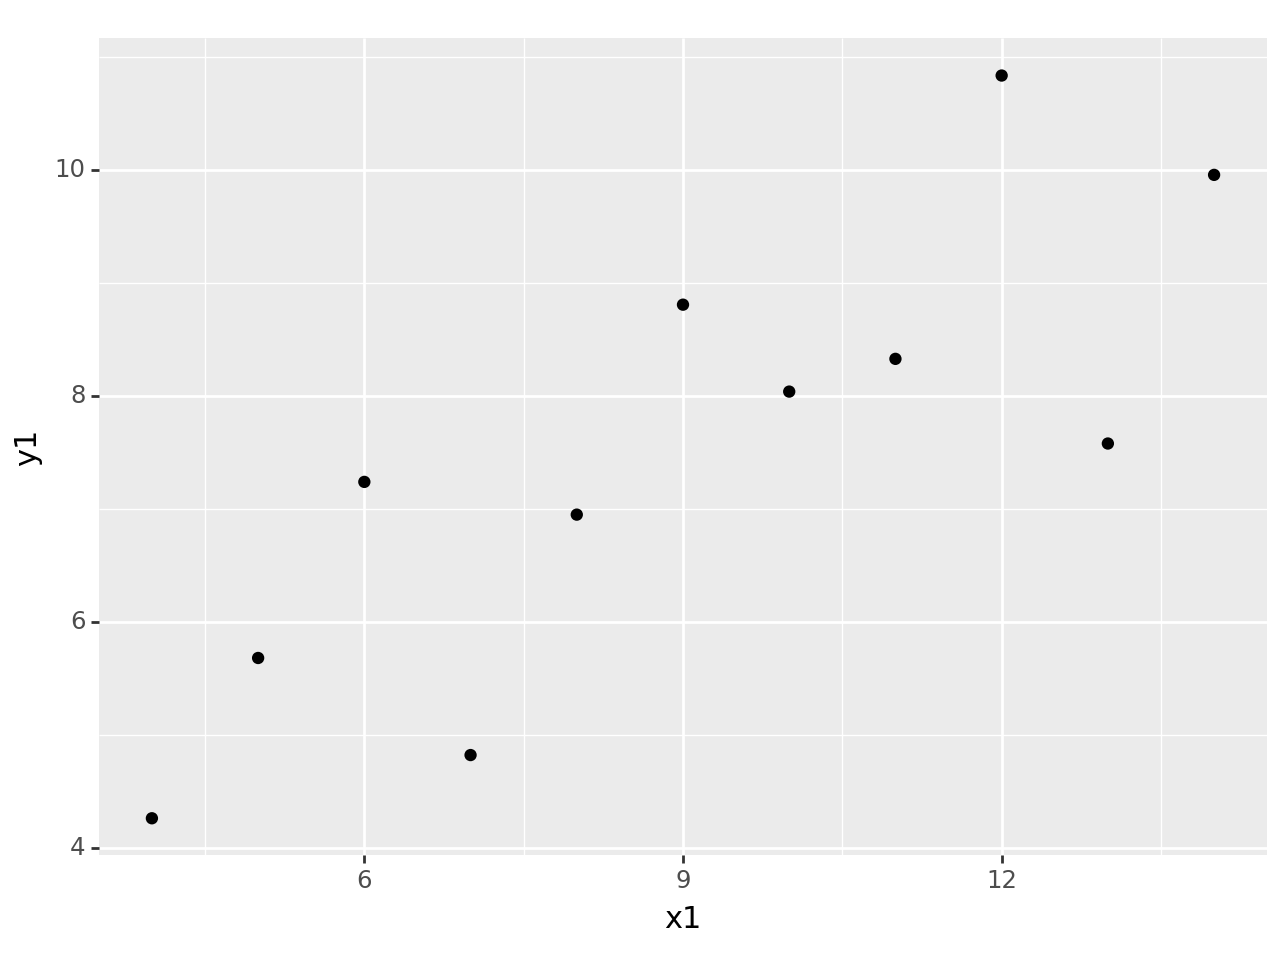

<Figure Size: (640 x 480)>

In [101]:
ggplot(aes('x1', 'y1'), df) + geom_point()

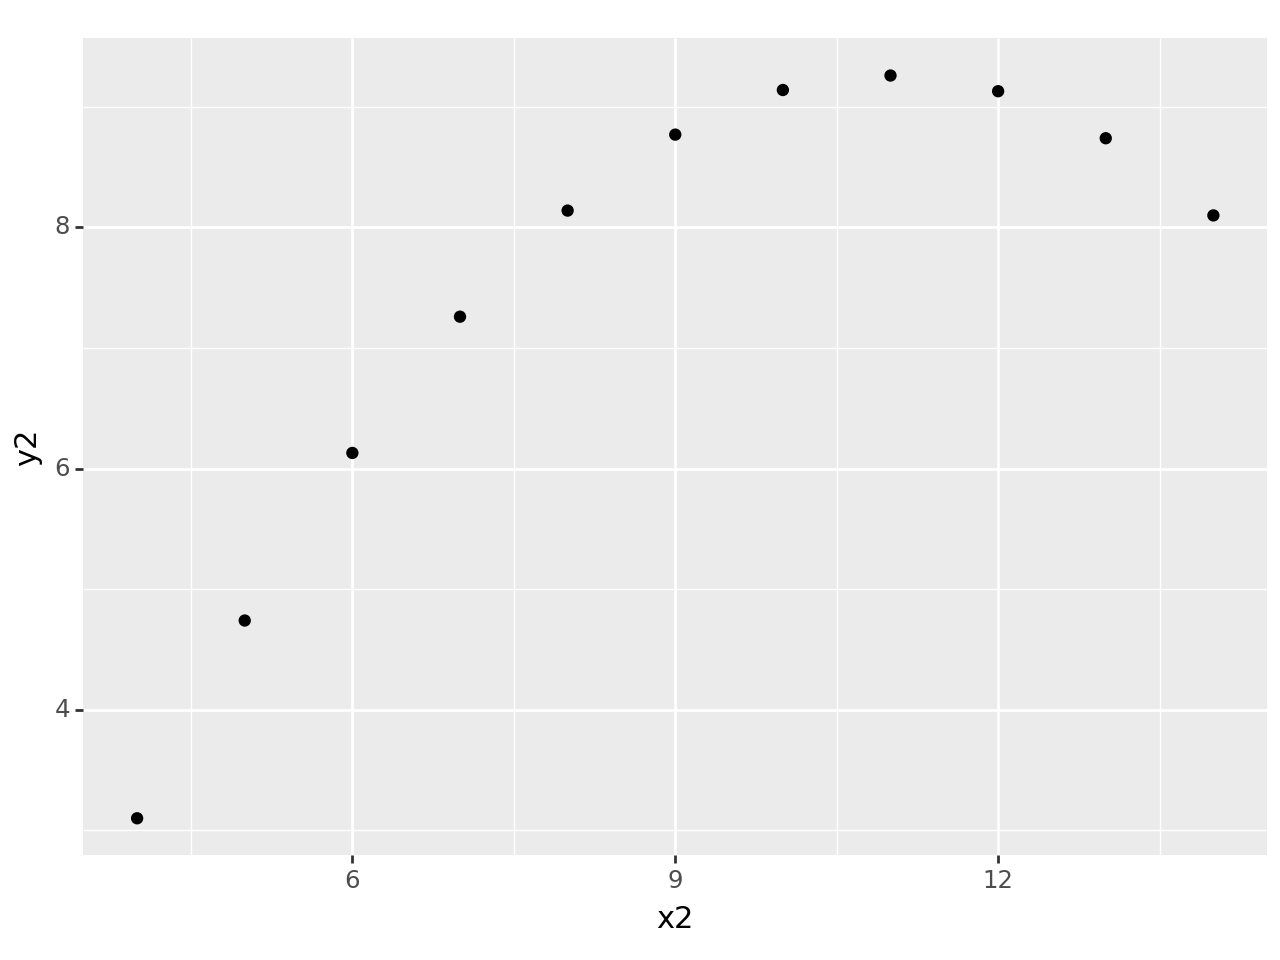

<Figure Size: (640 x 480)>

In [102]:
ggplot(aes('x2', 'y2'), df) + geom_point()

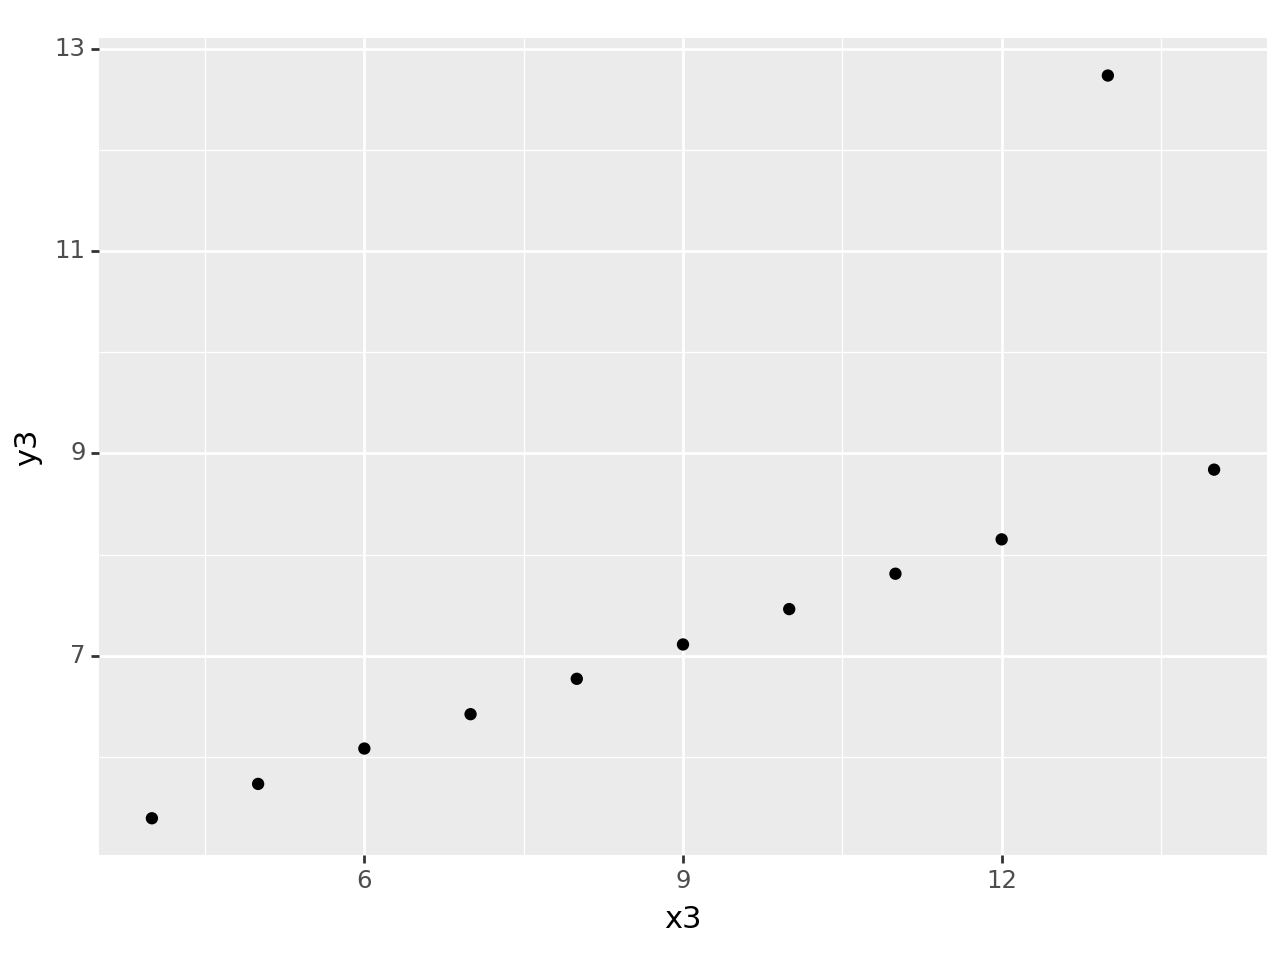

<Figure Size: (640 x 480)>

In [103]:
ggplot(aes('x3', 'y3'), df) + geom_point()

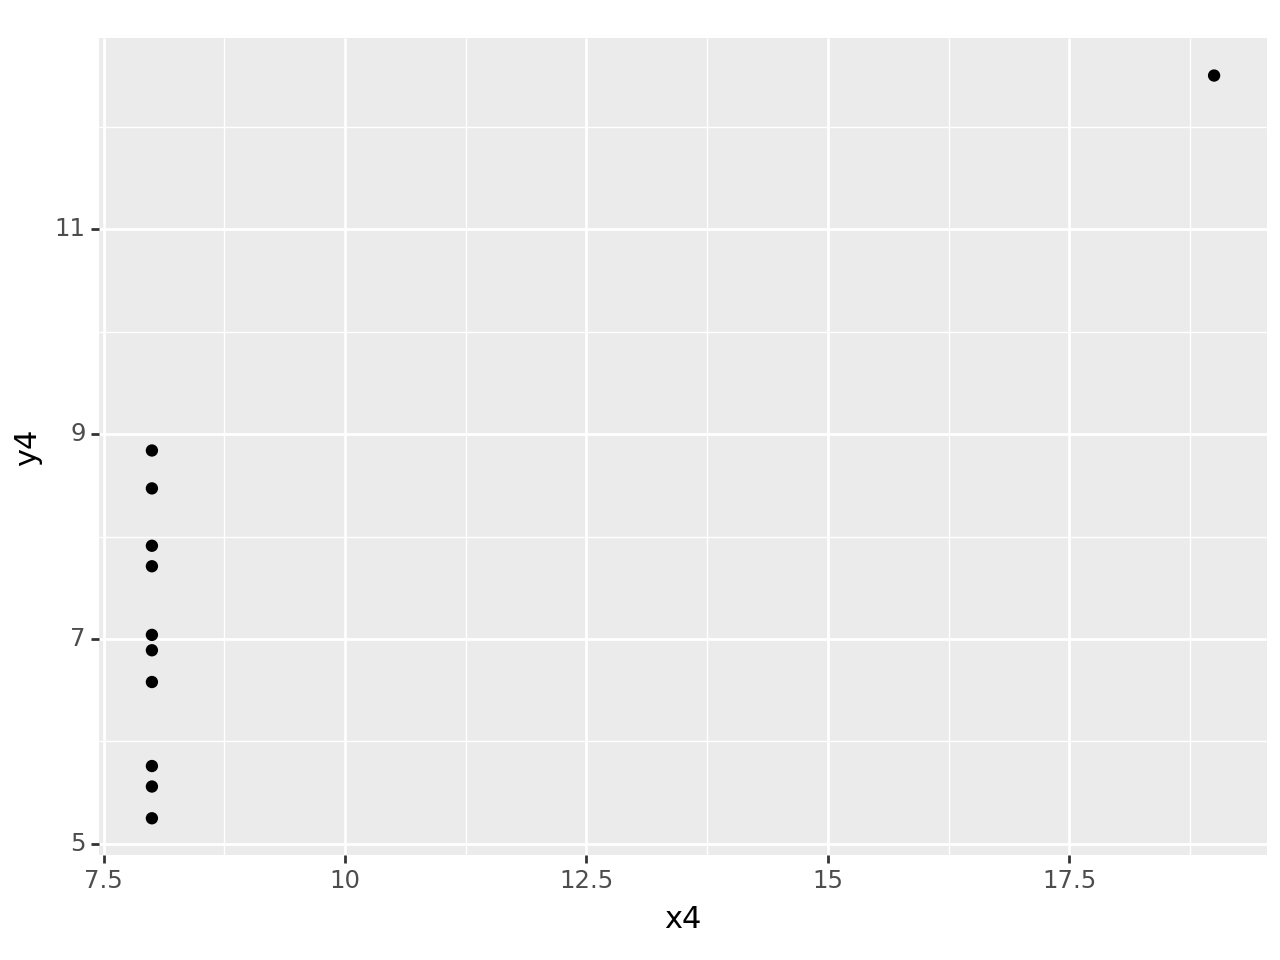

<Figure Size: (640 x 480)>

In [104]:
ggplot(aes('x4', 'y4'), df) + geom_point()

## 2. Prepara el fichero de causa de muerte para realizar gráficos utilizando el menor número posible de bucles

In [105]:
# Creamos el dataframe donde guardaremos los datos preparados

parsed_df = pd.DataFrame(columns = [
    'Year',
    'State',
    'Gender',
    'Death Cause',
    'Frequency'
])

In [106]:
# Leemos el archivo csv para obtener las columnas de causas de muerte

df = pd.read_csv(
    '../data/E30417A_0020.csv',
    delimiter = ';',
    encoding = 'latin1'
)
death_causes = df.columns[1::2].to_list()
genders = ['Hombres', 'Mujeres']    # No hace falta estar leyendo los géneros

In [107]:
# Creamos las combinaciones de género y causa de muerte para luego iterar sobre ellas
# y obtener los datos de cada una en una fila separada

possible_combinations = []
for death_cause in death_causes:    # Habrá mejores maneras, pero esto se programó
    for gender in genders:          # a la 1 de la mañana y no me salía nada mejor
        possible_combinations.append((gender, death_cause))

In [108]:
# Parsing chapuzero del csv para obtener el dataframe deseado

import csv
import numpy as np

year = -1
for i, row in enumerate(csv.reader(open('../data/E30417A_0020.csv'), delimiter=';')):
    row[0] = row[0].strip() # Los espacios sobrantes son molestos
    
    if i < 2:   # Nos saltamos las primeras dos filas
        continue
    if row[0] == 'Defunciones': # Nos saltamos las filas vacías
        continue
    if row[0].isnumeric():  # Si es un año, lo guardamos para saber el año actual
        year = int(row[0])
        continue

    # Recorremos cada celda de la fila a analizar y guardamos los datos en el dataframe
    for i, possible_combination in enumerate(possible_combinations):
        parsed_df = pd.concat([
            parsed_df,
            pd.DataFrame({
                'Year': [year],
                'State': [row[0]],
                'Gender': [possible_combination[0]],
                'Death Cause': [possible_combination[1]],
                'Frequency': [int(row[i + 1]) if row[i + 1].isnumeric() else np.NaN]
            })
        ], ignore_index = True)

In [109]:
# Forzado de que los hombres no puedan estar embarazados
# Así no se les imputan valores de embarazo en el siguiente paso

parsed_df.loc[(parsed_df['Death Cause'] == 'XV. EMBARAZO; PARTO Y PUERPERIO') & (parsed_df['Gender'] == 'Hombres'), 'Frequency'] = 0

In [110]:
# Imputacion de valores faltantes según la mediana

parsed_df['Frequency'] = parsed_df['Frequency'].fillna(int(parsed_df['Frequency'].median(skipna = True)))

In [111]:
import pandas.api.types as pdtypes

parsed_df['Year'] = parsed_df['Year'].astype(pdtypes.CategoricalDtype())
parsed_df['State'] = parsed_df['State'].astype(pdtypes.CategoricalDtype())
parsed_df['Gender'] = parsed_df['Gender'].astype(pdtypes.CategoricalDtype())
parsed_df['Death Cause'] = parsed_df['Death Cause'].astype(pdtypes.CategoricalDtype())

In [112]:
# Mostrado de resultados

df = parsed_df
display(df)

,Year,State,Gender,Death Cause,Frequency
0,2021,Agaete,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,0
1,2021,Agaete,Mujeres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,0
2,2021,Agaete,Hombres,II. TUMORES [NEOPLASIAS],8
3,2021,Agaete,Mujeres,II. TUMORES [NEOPLASIAS],4
4,2021,Agaete,Hombres,III. ENFS. DE SANGRE Y DE ÓRGS. HEMATOPOYÉTICO...,0
...,...,...,...,...,...
3187,2018,Vega de San Mateo,Mujeres,XVII. MALFORMACIONES CONGÉNITAS; DEFORMIDADES ...,0
3188,2018,Vega de San Mateo,Hombres,XVIII. SÍNTOMAS; SIGNOS Y HALLAZGOS ANORMALES ...,0
3189,2018,Vega de San Mateo,Mujeres,XVIII. SÍNTOMAS; SIGNOS Y HALLAZGOS ANORMALES ...,1
3190,2018,Vega de San Mateo,Hombres,XX. CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,2


## 3. Utilizar la librería _ggplot_ o su equivalente _plotnine_ para realizar los siguientes gráficos sobre las causas de muerte en Canarias. Indica si encuentras alguna propuesta que no recomiendes utilizar, en cuyo caso presenta una alternativa más adecuada

### Gráfico de dispersión de defunciones cada año

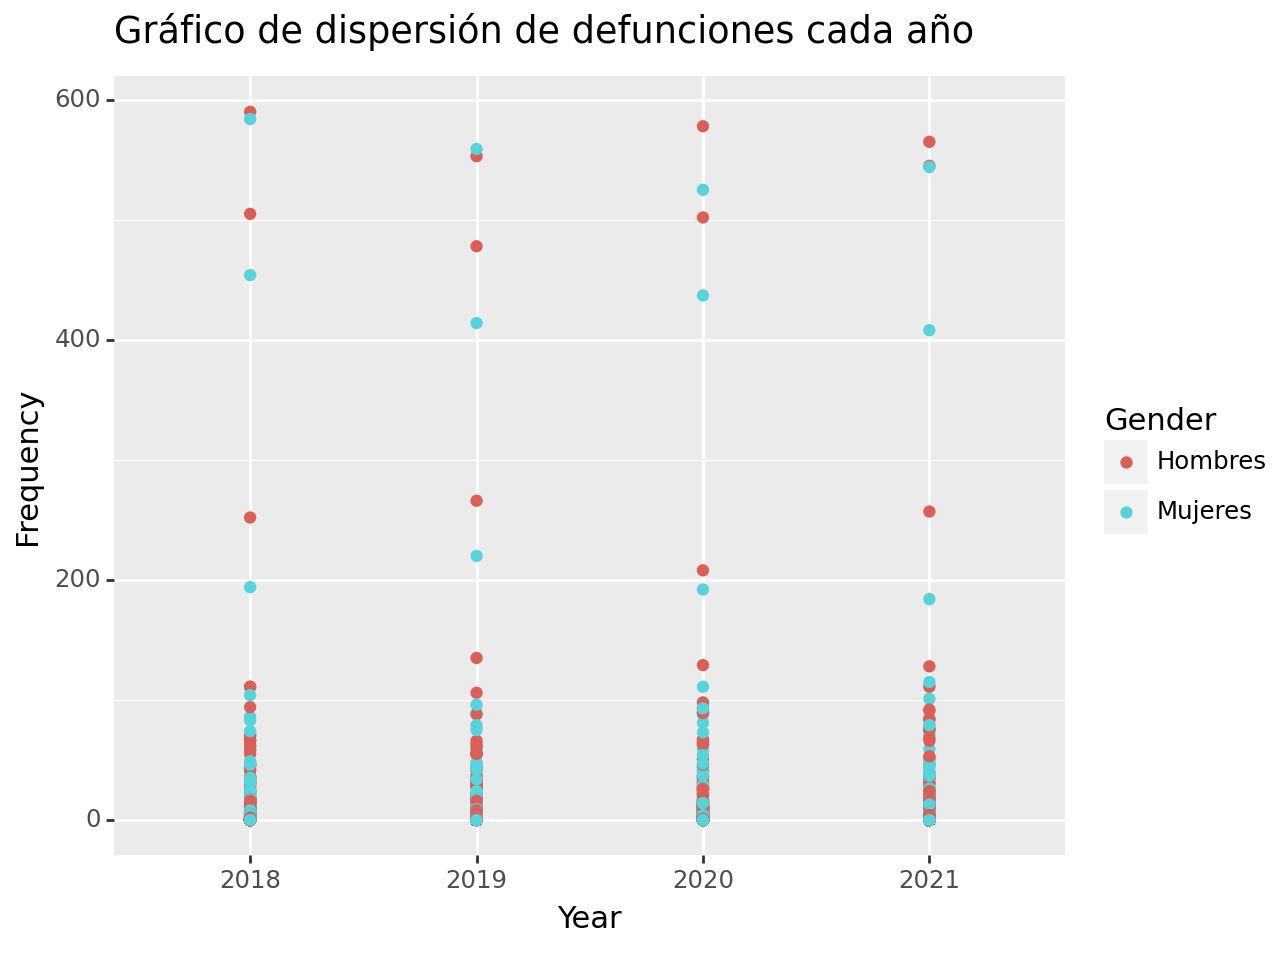

<Figure Size: (640 x 480)>

In [113]:
(ggplot(df, aes(x = 'Year', y = 'Frequency', color = 'Gender'))
    + geom_point()
    + ggtitle('Gráfico de dispersión de defunciones cada año')
)

### Gráfico de defunciones en el municipio de Arucas cada año 

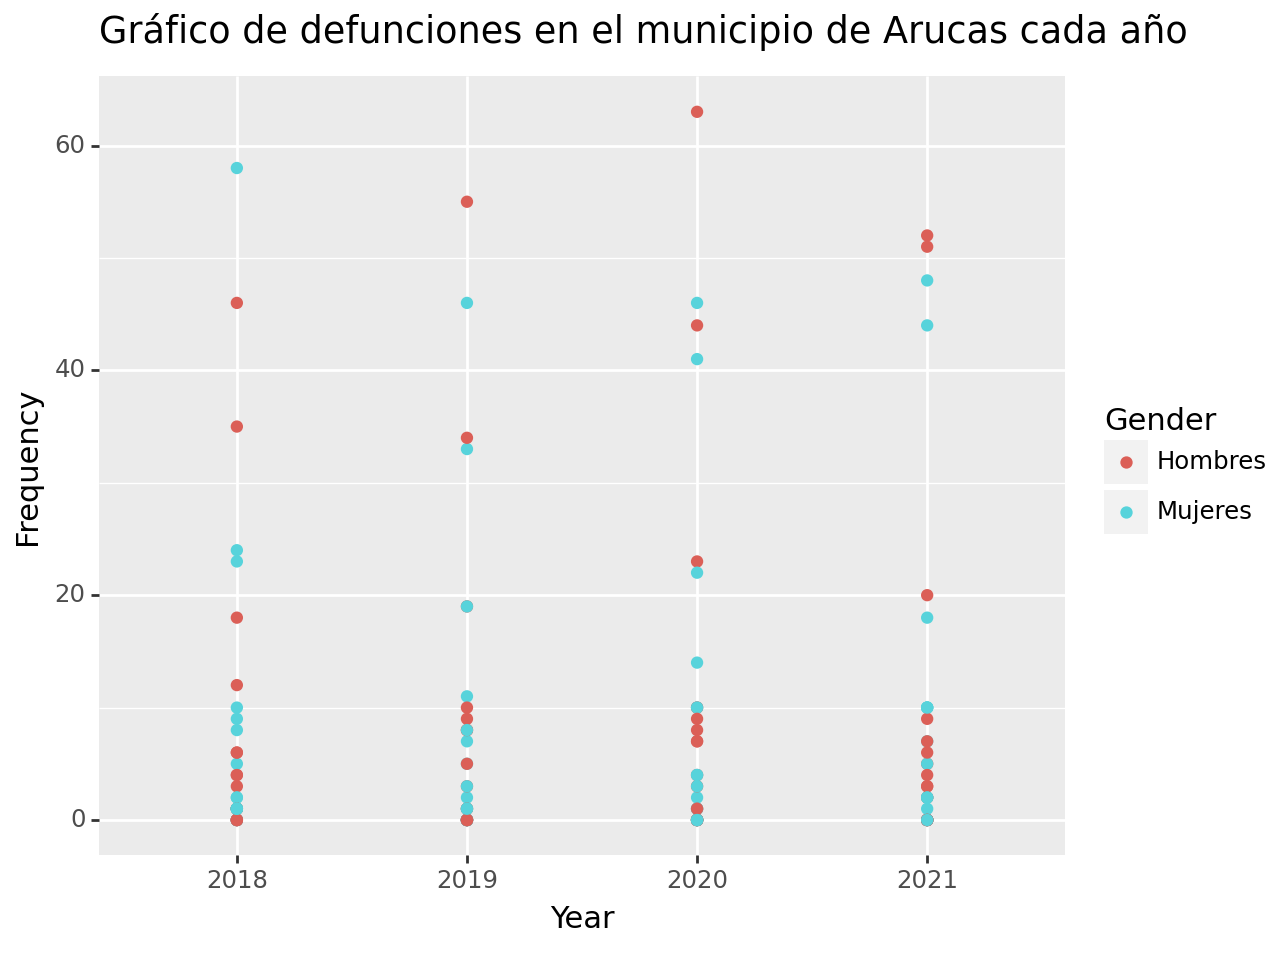

<Figure Size: (640 x 480)>

In [114]:
(ggplot(df[df['State'] == 'Arucas'], aes(x = 'Year', y = 'Frequency', color = 'Gender'))
    + geom_point()
    + ggtitle('Gráfico de defunciones en el municipio de Arucas cada año')
)

### Gráfico de barras del total de defunciones cada año

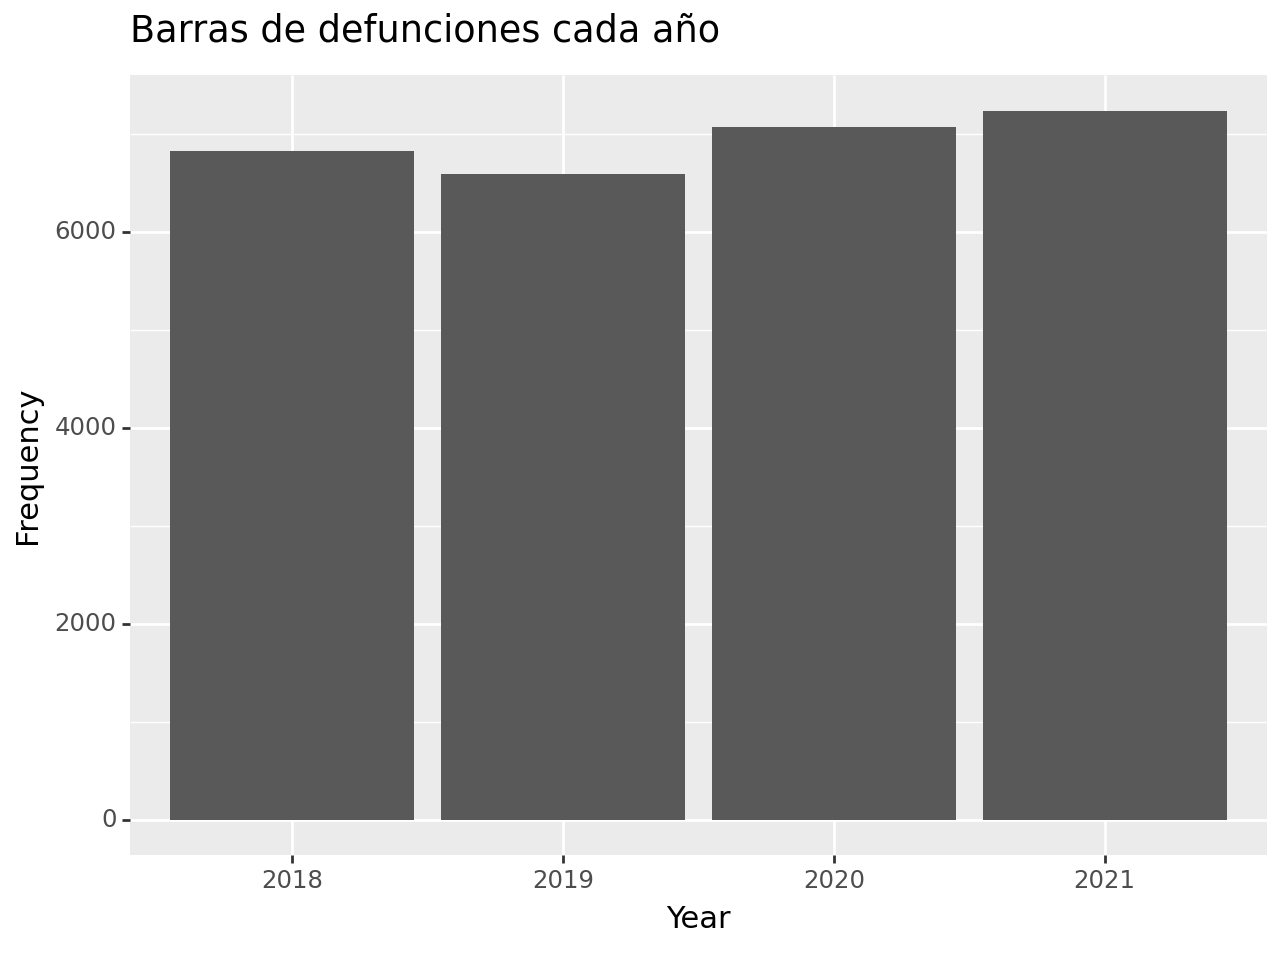

<Figure Size: (640 x 480)>

In [130]:
(ggplot(df, aes(x = 'Year', y = 'Frequency'))
    + geom_bar(stat = 'identity')
    # Intento de poner las etiquetas en las barras
    # + geom_text(aes(label = 'Frequency'), va = 'bottom', position = 'identity')
    + ggtitle('Barras de defunciones cada año')
)

### Gráfico de barras apiladas por cada causa de defunción al año

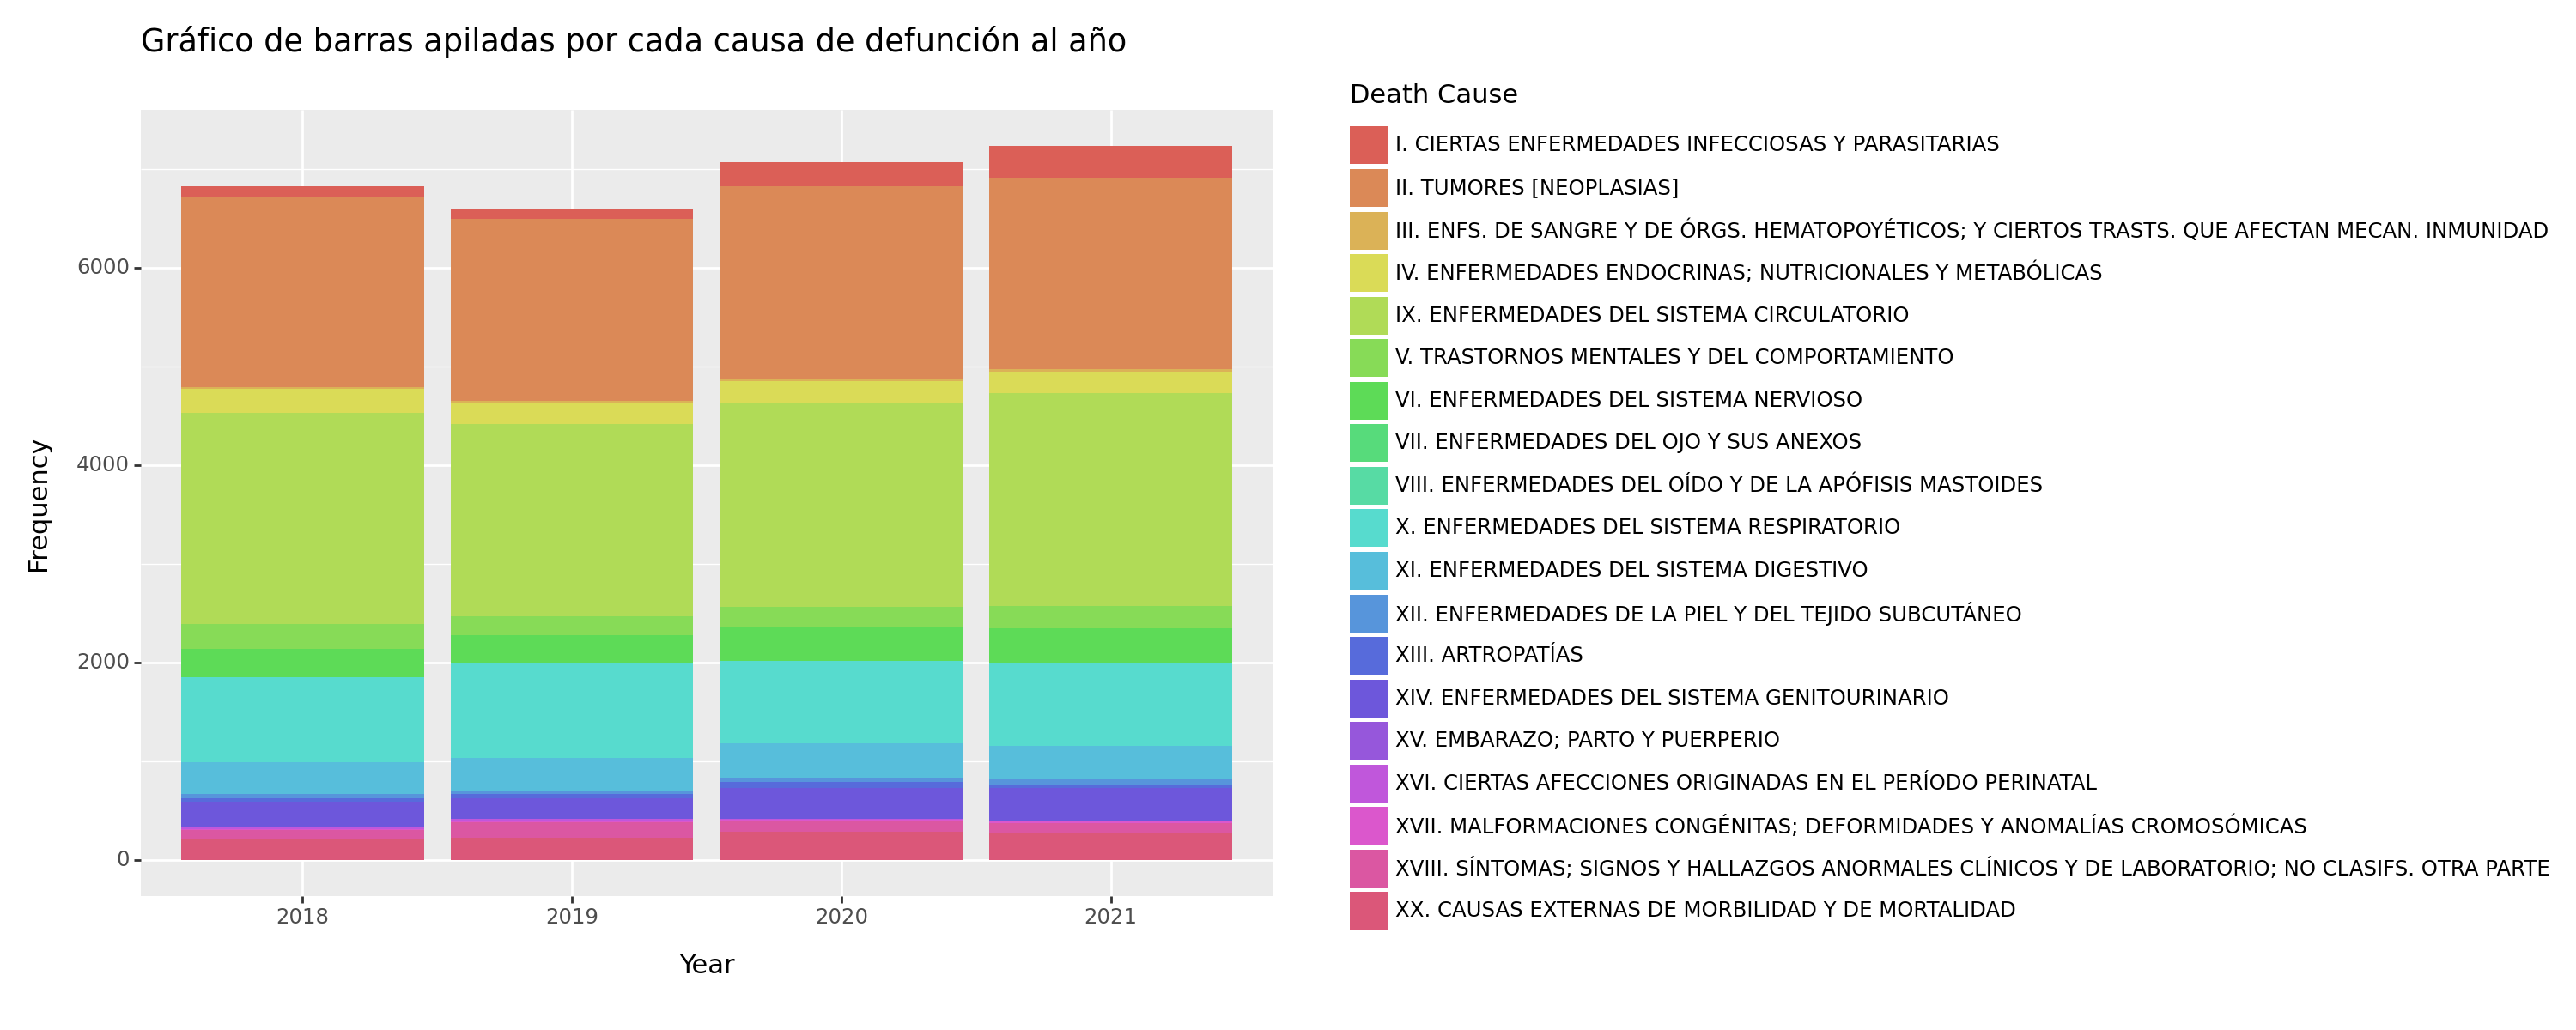

<Figure Size: (1500 x 600)>

In [116]:
(ggplot(df, aes(x = 'Year', y = 'Frequency', fill = 'Death Cause'))
    + geom_col()
    + theme(figure_size=(15, 6))
    + ggtitle('Gráfico de barras apiladas por cada causa de defunción al año')
)

### Gráfico de burbujas en cada municipio por causa de defunción del año 2018 al 2021

C:\Users\cabre\AppData\Local\Temp\ipykernel_1976\2472508315.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


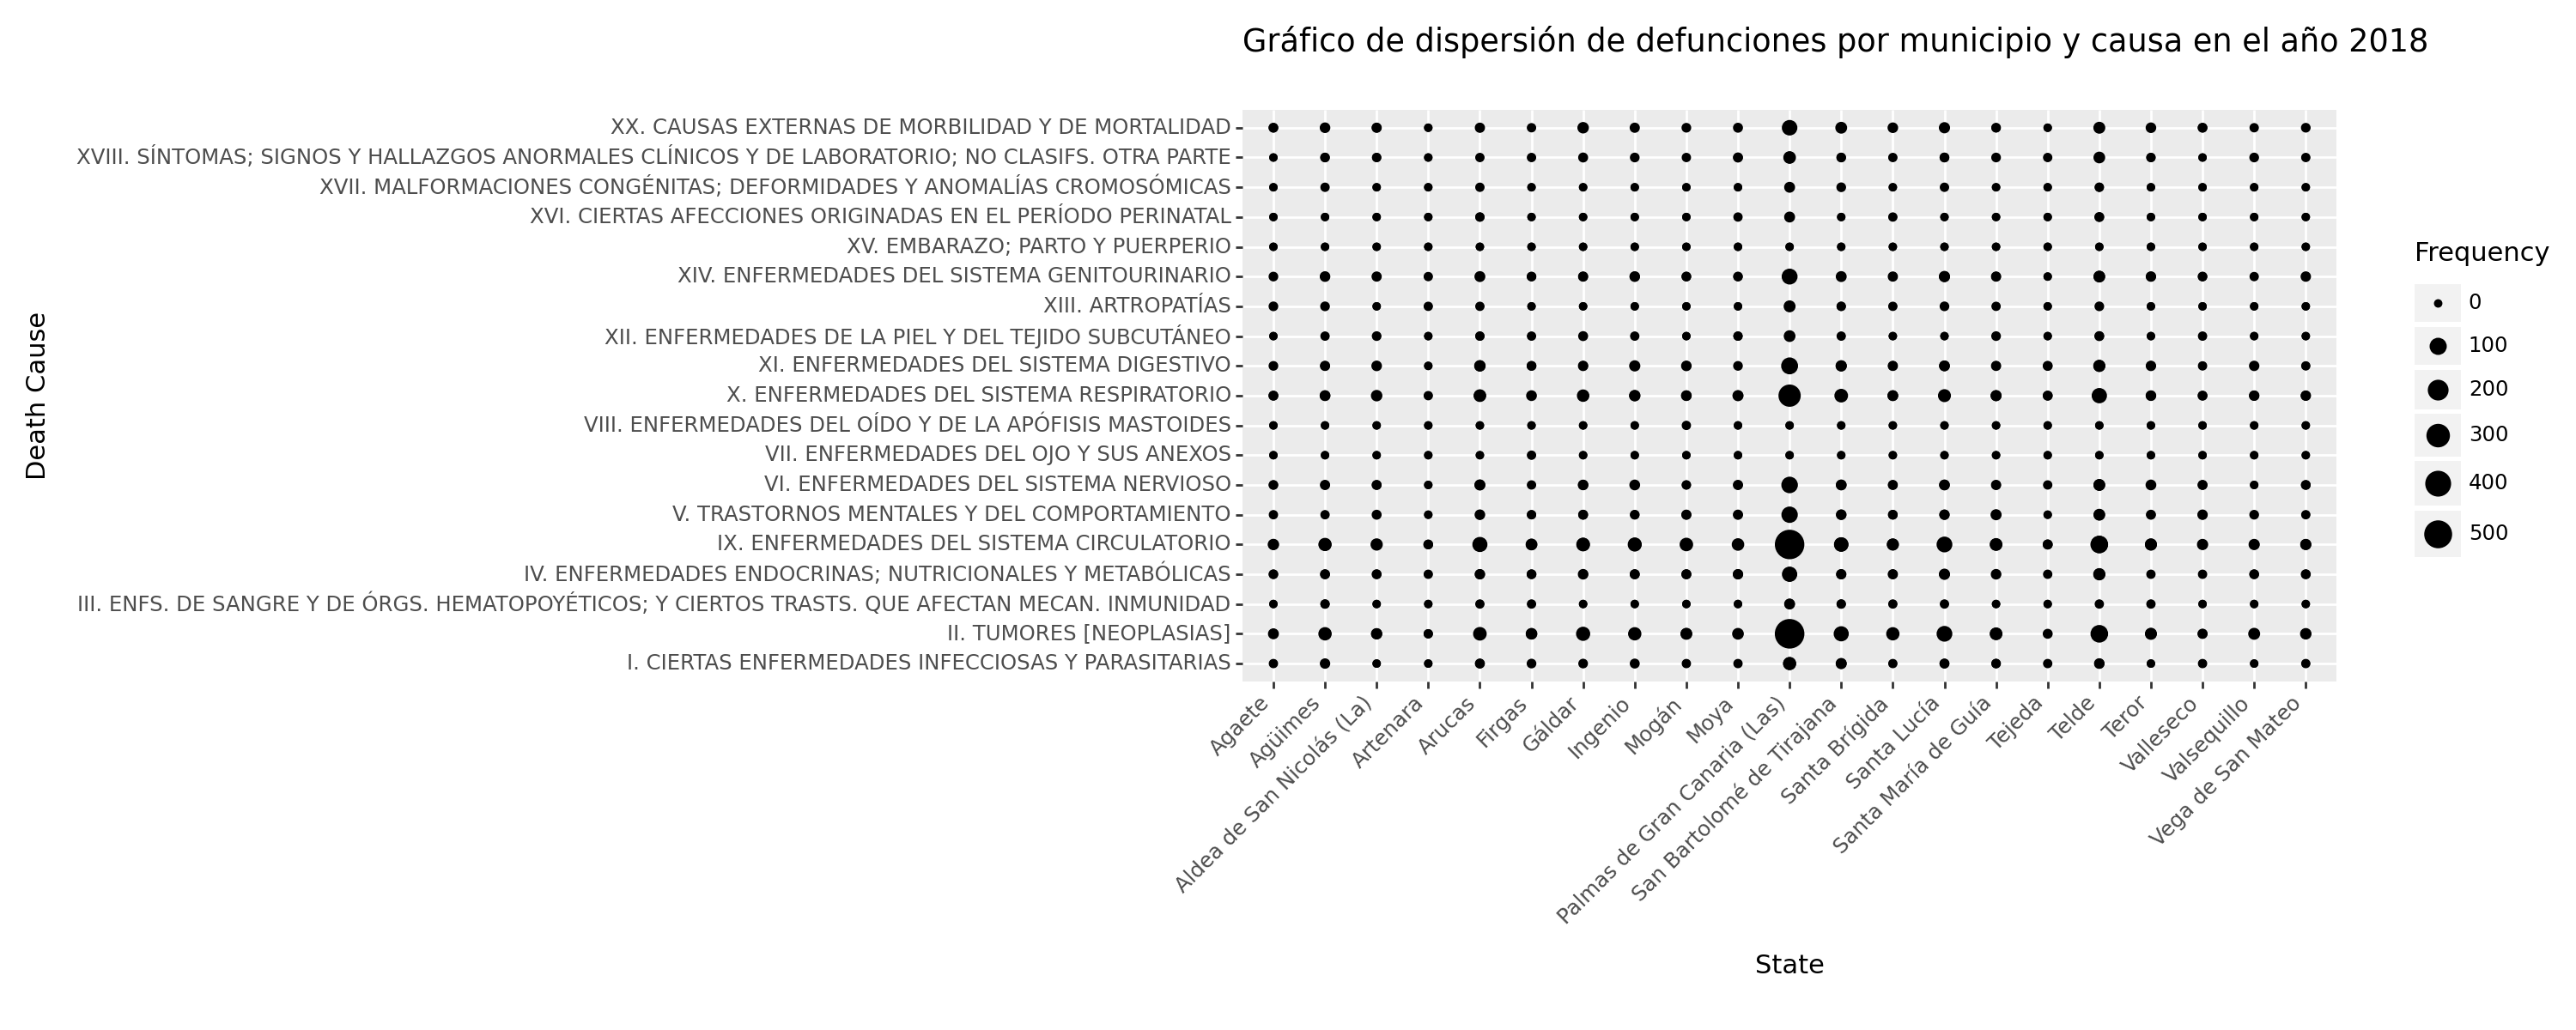

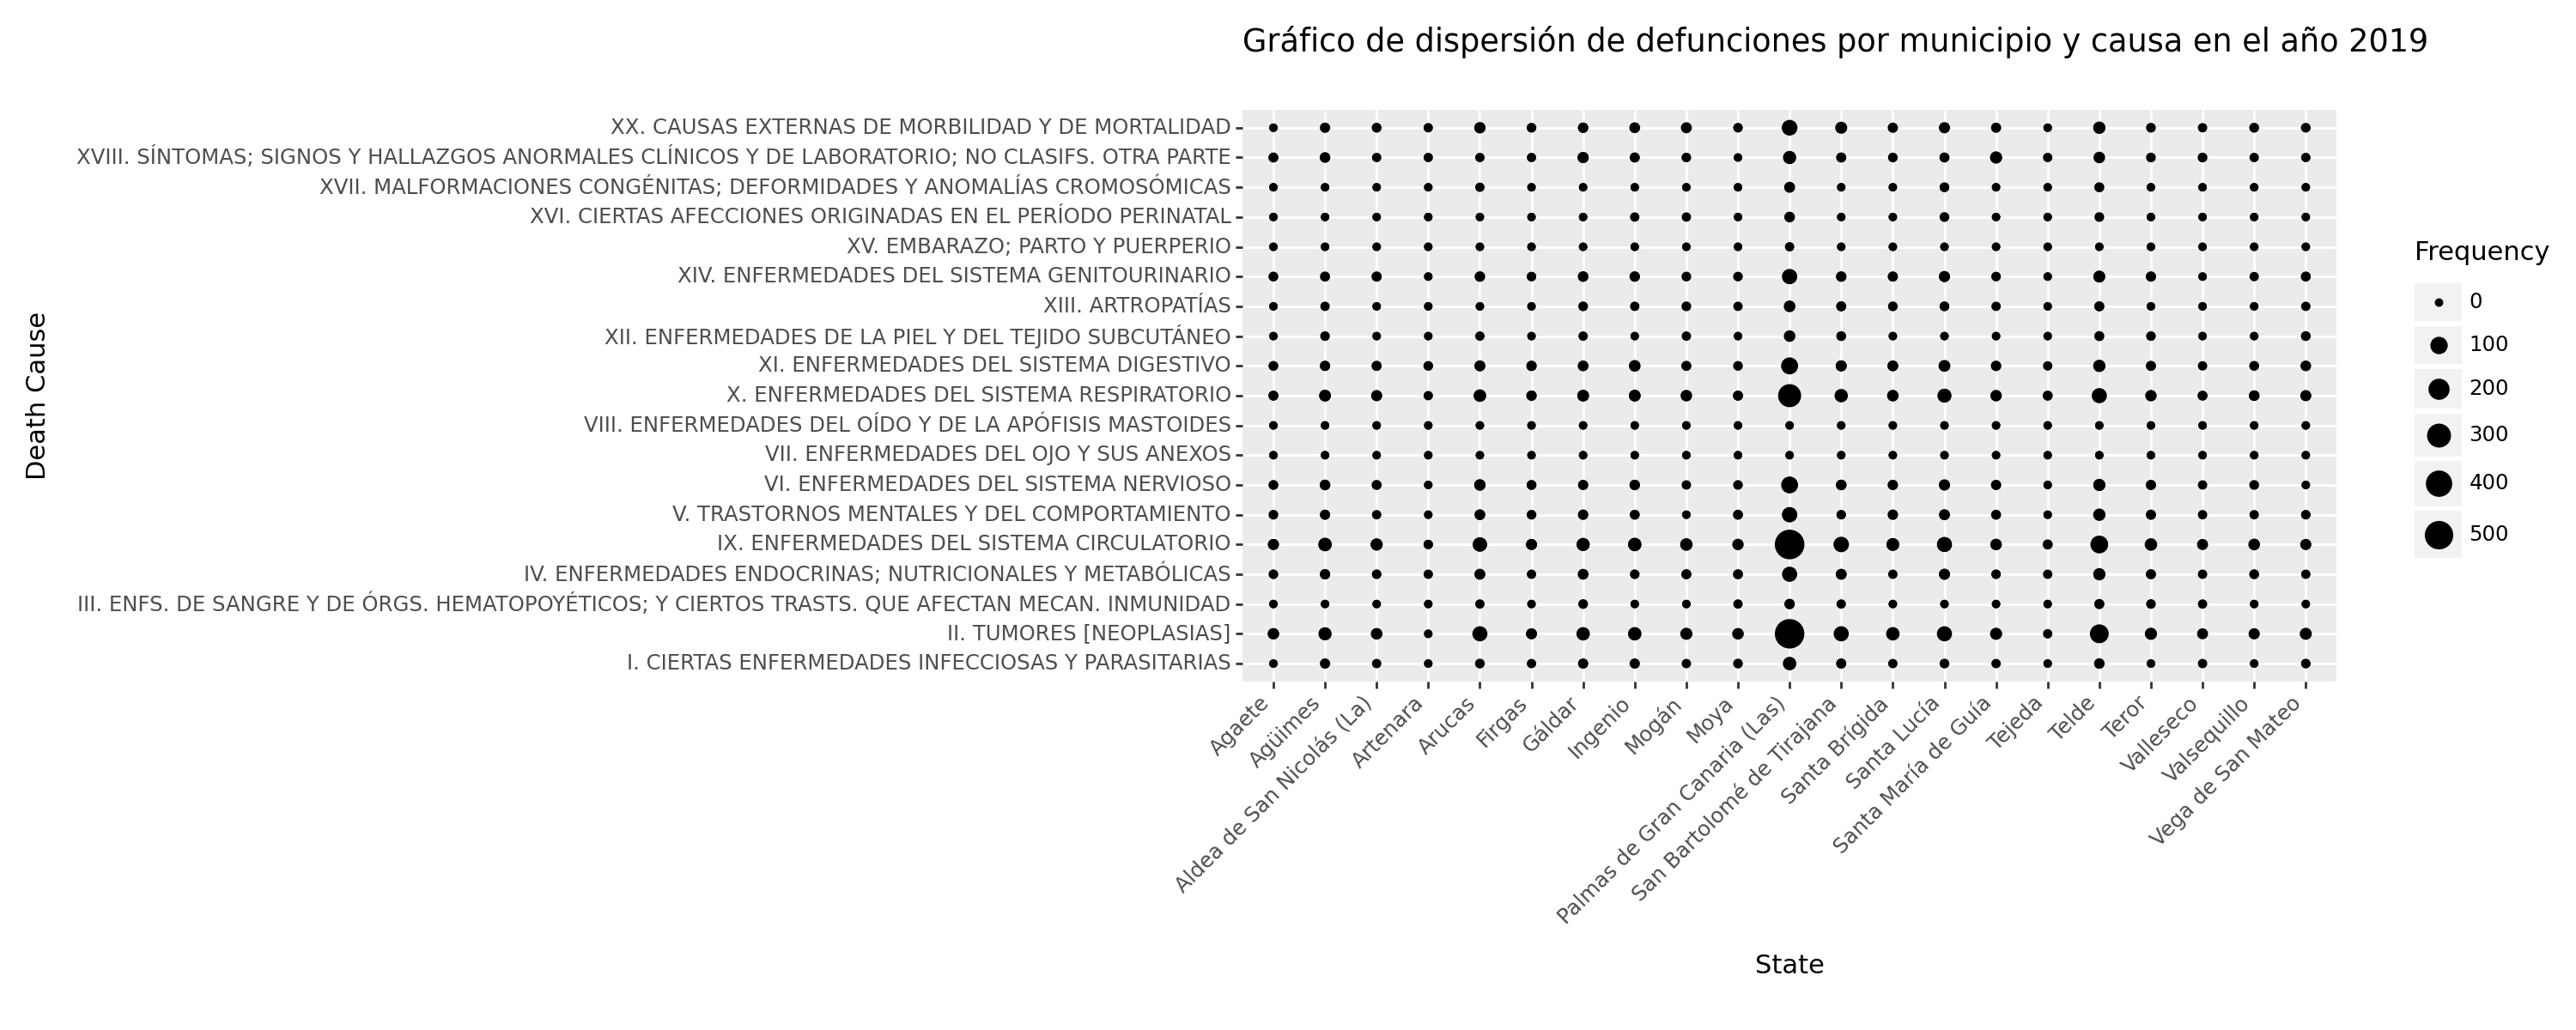

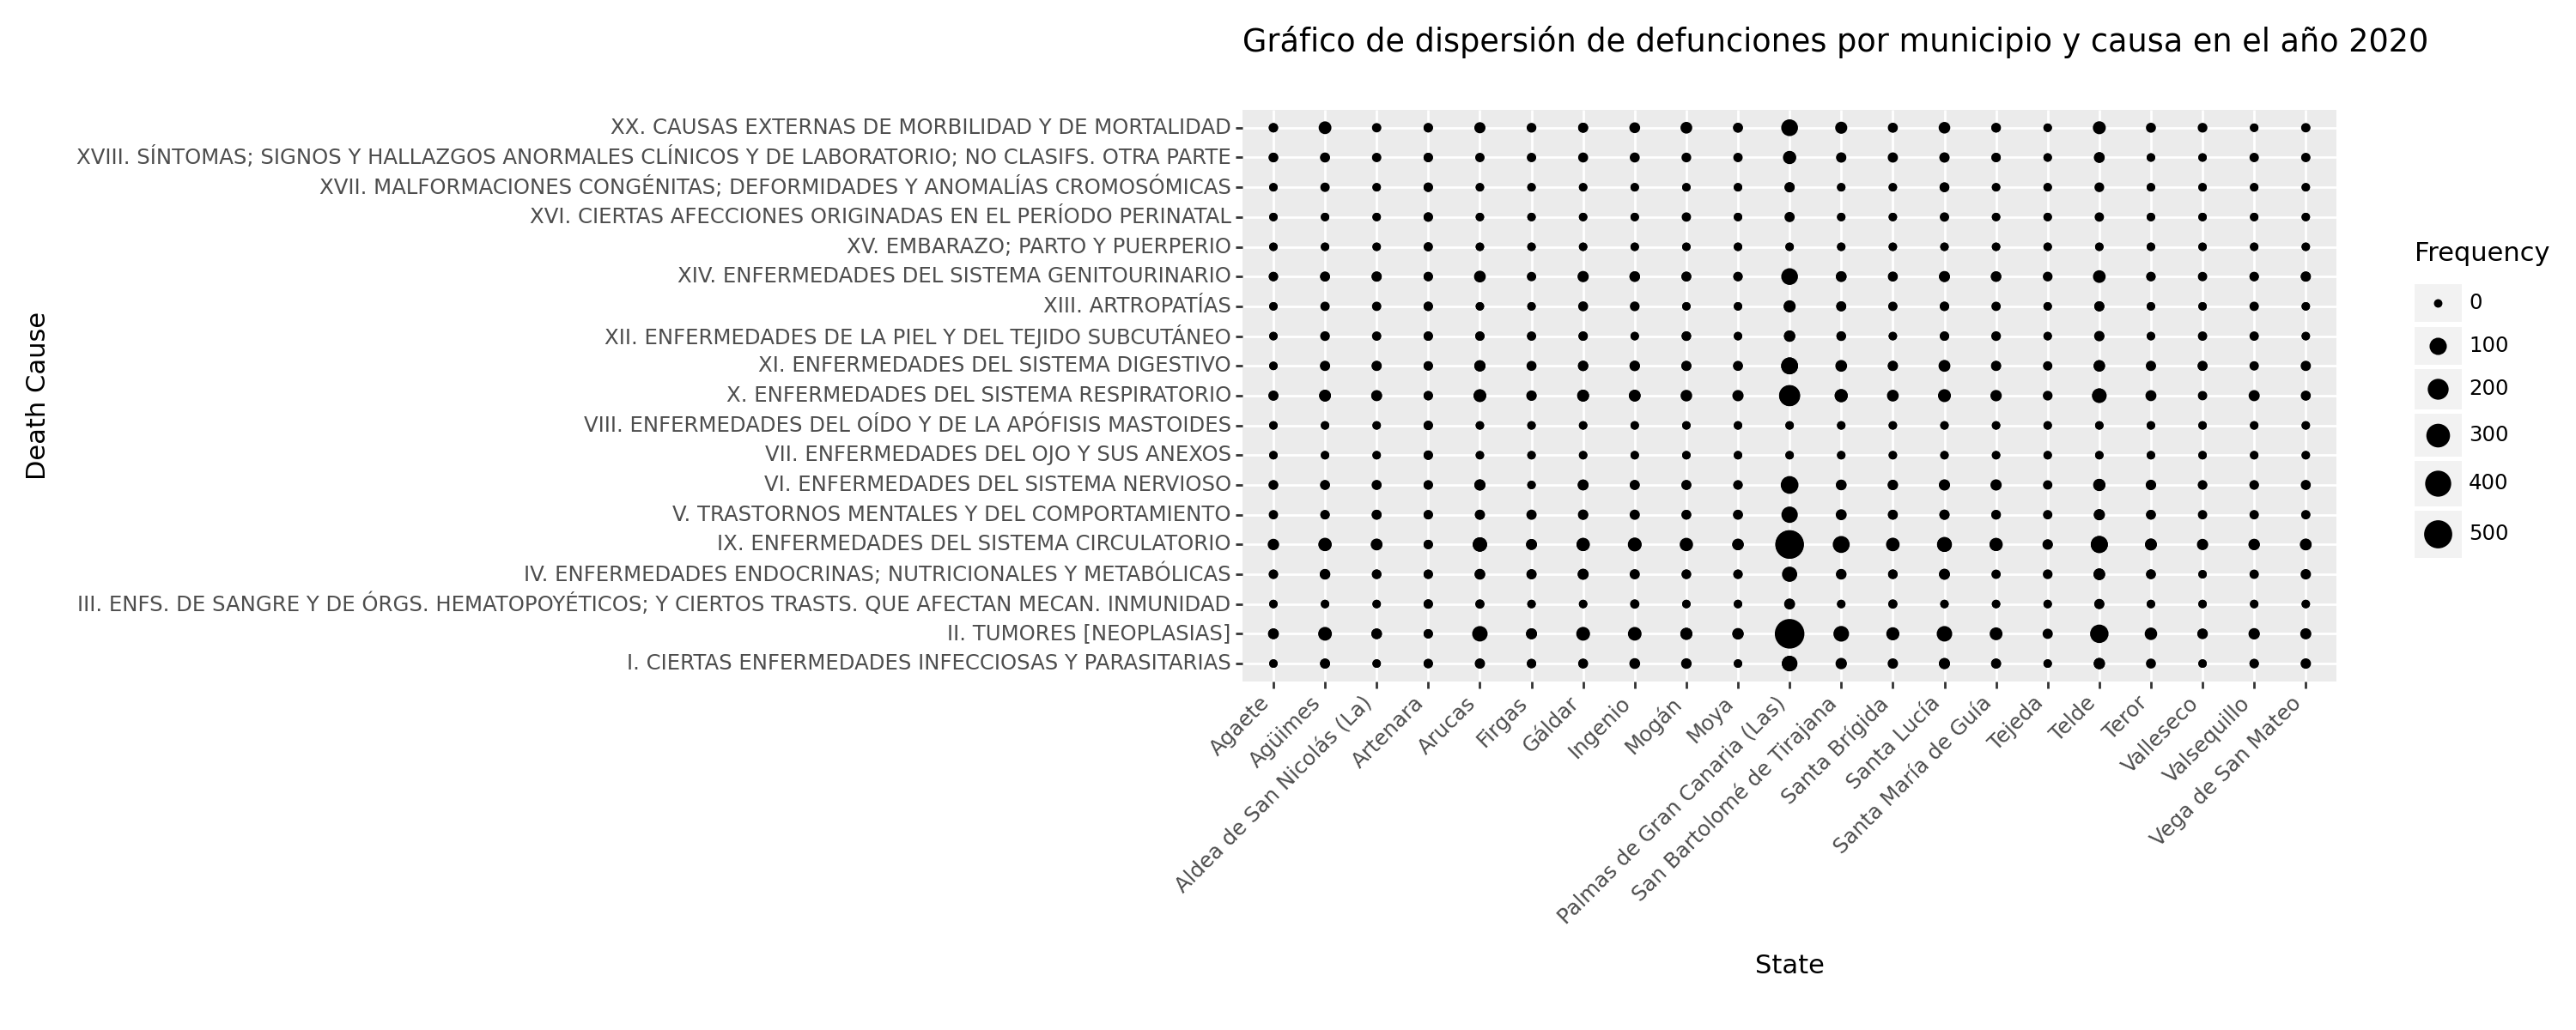

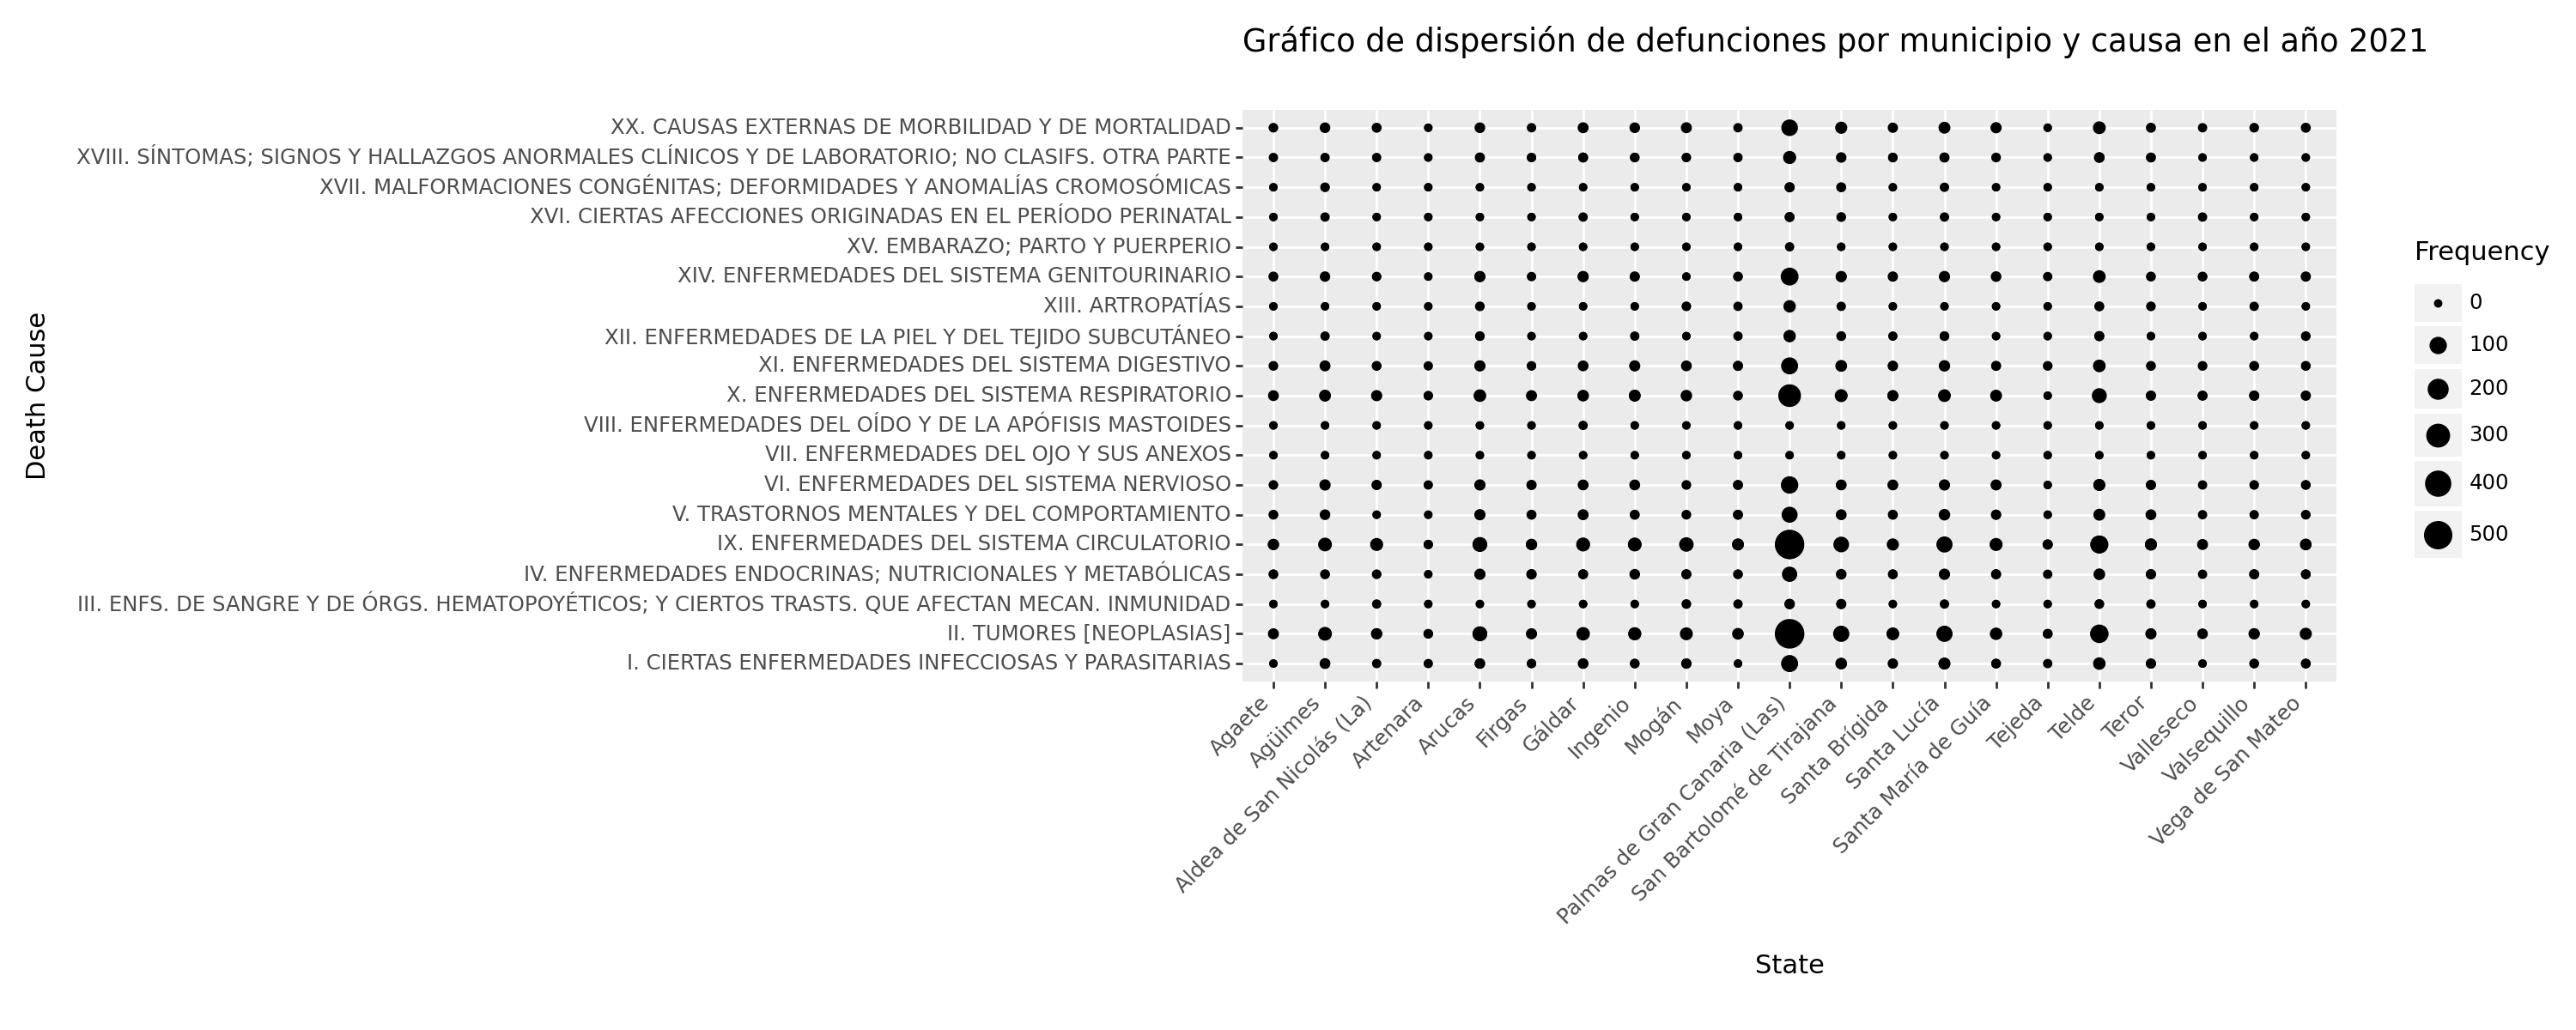

Year
2018    
2019    
2020    
2021    
dtype: object

In [133]:
def bubble_chart_assignment(df):
    year = df['Year'].unique()[0]

    return (ggplot(df, aes(x = 'State', y = 'Death Cause', size = 'Frequency'))
        + geom_point()
        + theme(figure_size = (15, 6), axis_text_x = element_text(rotation = 45, hjust = 1))
        + ggtitle(f'Gráfico de dispersión de defunciones por municipio y causa en el año {year}')
    )

df.groupby('Year').apply(bubble_chart_assignment)